In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=42)

In [2]:
def get_sax_symbol_frequency(word):
    return {key: word.count(key) for key in set(word)}

def sine(A, T, c, size):
    return np.array([A*np.sin(2*np.pi/T * i) + c for i in range(size)])

def exponential(A, k, c, size):
    return np.array([A*np.exp(k * i) + c for i in range(size)])


W = 20
N = 2000

xs = range(N)
ts = sine(A=10, T=200, c=0, size=N) + sine(A=2, T=20, c=0, size=N) + sine(A=20, T=100, c=0, size=N) + np.random.normal(0, 5, size=N)
ts = exponential(A=100, k=0.0005, c=0, size=N)# + sine(A=1, T=150, c=0, size=N)# + np.random.normal(0, 5, size=N)

In [3]:
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize # alphabet size

A = 4

# normalize timeseries so that breakpoints can be determined by N(0, 1) Gaussian
ts_normed = znorm(ts)
# perform PAA
ts_paa = paa(ts_normed, W)
# convert PAA reduced timeseries to SAX representation using A letters
word = ts_to_string(ts_paa, cuts_for_asize(A))
print(f"SAX representation of the timeseries: {word}")
print(f"frequencies of letters: {get_sax_symbol_frequency(word)}")

SAX representation of the timeseries: aaaaaaabbbbcccdddddd
frequencies of letters: {'b': 4, 'a': 7, 'c': 3, 'd': 6}


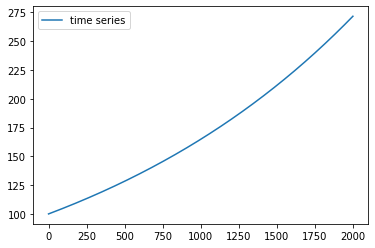

In [4]:
# TODO: LOW PRIORITY. maybe check why implementations differ. 

# plot time series and compare own and saxpy PAA version
plt.plot(range(len(ts)), ts, label="time series")
#plt.plot(range(len(ts)), np.repeat(my_paa(ts_normed, W), N//W), label="own PAA")
#plt.plot(range(len(ts)), np.repeat(paa(ts_normed, W), N//W), label="saxpy PAA")
plt.legend()

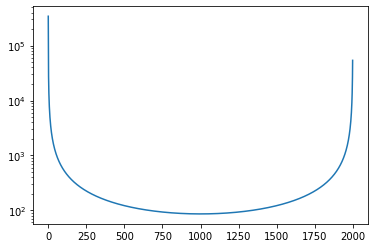

c:\users\jannik\projects\sax-dashboard\venv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


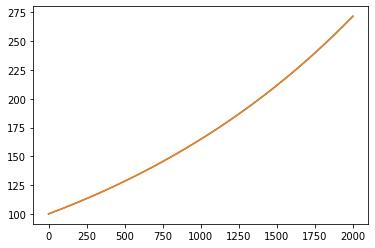

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def reduce_ts(ts, tol=0.1):
    ts_fourier = np.fft.fft(ts)
    threshold = tol*np.max(np.abs(ts_fourier))
    ft_deflated = [[idx, t] for idx, t in enumerate(ts_fourier) if abs(t) >= threshold]
    return ft_deflated, len(ts)

def inflate_ts(ft, n):
    ft_inflated = np.zeros(n).astype(np.complex64)
    for idx, f in ft:
        ft_inflated[idx] = f
    return np.fft.ifft(ft_inflated)


ft_deflated, n = reduce_ts(ts, tol=0.0001)
ts_retrieved = inflate_ts(ft_deflated, n)

plt.yscale('log')
plt.plot(range(len(np.fft.fft(ts))), np.abs(np.fft.fft(ts)))
plt.show()
plt.plot(range(len(ts)), ts)
plt.plot(range(len(ts)), ts_retrieved)
plt.show()